Subodh Rai<br>
subodhrai898@gmail.com<br>
**Computer Vision Problem**<br>
Image Classification using CNN network


In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['subodh', 'fashionmnist', 'sk1234']


In [101]:
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(np.float32(X))

Import Necessary data from pickle file<br>
X = Training Data<br>
Y = Labels<br>
textx = Test Data

In [102]:
import numpy as np
X = np.load('../input/subodh/train_image.pkl')
X = np.array(X)
Y = np.load('../input/subodh/train_label.pkl')
Y = np.array(Y)
testx = np.load('../input/sk1234/test_image.pkl')
testx = np.array(testx)
print(X.shape)
print(Y.shape)
print(X[20,127:175])


(8000, 784)
(8000,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


The given Data is in flatten form<br>
so we reshape it 28X28<br>
but before That we normalize the data

In [103]:
#standardizing data
X = X/255 
testx = testx/255
X_new = X



Also we Label Classes as series form.<br>
Use sklearn LabelEncoder for it.<br>

In [104]:
print(Y[:20])                          #original labels
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = [0,2,3,6]
values = np.array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
label_encoder.fit(values)
vl = label_encoder.transform(values)
print(vl)
Y2 = label_encoder.transform(Y)              #new Label
print(Y2[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 2 3 6]
[0 1 2 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


After that we split data with size 0.1 and stratify it so that each class have same number of example

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y2, test_size=0.1, random_state=0,stratify=Y2)
tb_t = y_test

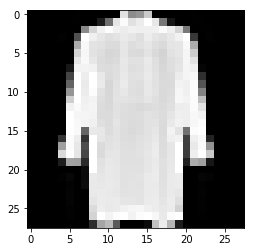

In [106]:
import matplotlib.pyplot as plt
plt.imshow(np.resize(X_train[5],(28,28)),cmap='gray')

Now here we resize Data in 28X28X1 to fed it into our CNN Network

In [107]:
X_new = np.resize(X_new,(X_new.shape[0],28,28,1))
X_train = np.resize(X_train,(X_train.shape[0],28,28,1))
X_test = np.resize(X_test,(X_test.shape[0],28,28,1))
testx = np.resize(testx,(testx.shape[0],28,28,1))

Convert Output labels to Categorical Data

In [108]:
from numpy import argmax
from keras.utils import to_categorical
# define example
# one hot encode
y_train= to_categorical(y_train)
y_test = to_categorical(y_test)
Y_new = to_categorical(Y2)
print(y_test[:5])


[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [109]:
# from keras.datasets import fashion_mnist

# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [110]:
# from keras.datasets import fashion_mnist

# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# print(y_test.shape)
# x_train = x_train/255
# x_test = x_test/255
# X_train = np.resize(x_train,(x_train.shape[0],28,28,1))
# X_test = np.resize(x_test,(x_test.shape[0],28,28,1))
# from numpy import argmax
# from keras.utils import to_categorical
# # define example
# # one hot encode
# y_train= to_categorical(y_train)
# y_test = to_categorical(y_test)
# print(y_test.shape)
# print(X_test.shape)

We build our CNN(convolution neural network ) using Keras backend to Tensorflow<br>
Now in this model we use SEQUENTIAL MODEL with DENSE LAYER
WE ALSO USE DROPOUT to regularize it

In [111]:
#Import necessary file
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
import pandas as pd
from keras.metrics import categorical_accuracy


This is our Sequential model<br>
first layer is our CNN layer with 32 filters and Kernel size of 3X3 this layer will take 28x28x1 
also each layer has Relu activation<br>
BatchNormalization  is used after each layer to reduce overfitting.
A pooling layer is used to reduce the paramters.<br>
Architecture<br>
Layer 1-> CNN 32 filters<br>
          BatchNormalization<br>
          MaxPool<br>
Layer 2-> CNN 64 filters<br>
          BatchNormalization<br>
          MaxPool<br>
 Layer 3-> CNN 128 filters<br>
          BatchNormalization<br>
          MaxPool<br>
          Dropout
<br>
Layer 4->Dense 512<br>
Layer 5->Dense output 4 activation 'Softmax'<br>

OPtimizer = 'Adam' lr = 0.06
Loss = 'Categorical cross Entropy'
          

In [112]:
num_of_classes = 4

cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(3, 3),init='glorot_uniform',input_shape=(28,28,1),activation='relu',padding='same'))
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same'))


cnn2.add(Conv2D(64, kernel_size=3,activation='relu',padding = 'same'))
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same'))


cnn2.add(Conv2D(128, kernel_size=3,activation='relu',padding = 'same'))
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2), padding='same'))
cnn2.add(Dropout(0.25))


cnn2.add(Flatten())
cnn2.add(Dense(512, activation='relu'))
cnn2.add(Dropout(0.5))
cnn2.add(Dense(num_of_classes, activation='softmax'))
cnn2.compile(loss = 'categorical_crossentropy', optimizer = 'Adam' , metrics = ['accuracy'])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1..., activation="relu", padding="same", kernel_initializer="glorot_uniform")`
  after removing the cwd from sys.path.


Summary of the model

In [113]:
cnn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_17 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 128)         73856     
__________

"Before Fit we augment data for this we use ImageDataGenerator of Keras with shear and horizontal flip"

In [114]:
from keras.preprocessing.image import ImageDataGenerator
ft = ImageDataGenerator(                                      #Data Augmentation
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
history2 = cnn2.fit_generator(ft.flow(X_new, Y_new, batch_size=512),     #Batch of 512 and generator ft
                          steps_per_epoch = 256,              
                          epochs =20,
                          validation_data = (X_test,y_test),
                          validation_steps = 500)


Epoch 1/20
256/256 [==============================] - 27s 106ms/step - loss: 0.7602 - acc: 0.7637 - val_loss: 0.3892 - val_acc: 0.8450
Epoch 2/20
256/256 [==============================] - 26s 102ms/step - loss: 0.3713 - acc: 0.8548 - val_loss: 0.3102 - val_acc: 0.8763
Epoch 3/20
256/256 [==============================] - 26s 103ms/step - loss: 0.3118 - acc: 0.8787 - val_loss: 0.2264 - val_acc: 0.9150
Epoch 4/20
256/256 [==============================] - 26s 102ms/step - loss: 0.2723 - acc: 0.8945 - val_loss: 0.2013 - val_acc: 0.9112
Epoch 5/20
256/256 [==============================] - 26s 102ms/step - loss: 0.2422 - acc: 0.9065 - val_loss: 0.1959 - val_acc: 0.9212
Epoch 6/20
256/256 [==============================] - 28s 108ms/step - loss: 0.2158 - acc: 0.9156 - val_loss: 0.1328 - val_acc: 0.9400
Epoch 7/20
256/256 [==============================] - 27s 105ms/step - loss: 0.1937 - acc: 0.9243 - val_loss: 0.1273 - val_acc: 0.9563
Epoch 8/20
256/256 [==============================] - 2

Plot of accuracy, loss and val_loss

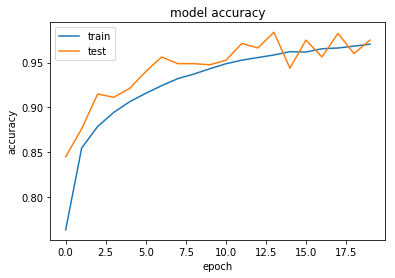

In [121]:
import matplotlib.pyplot as plt
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


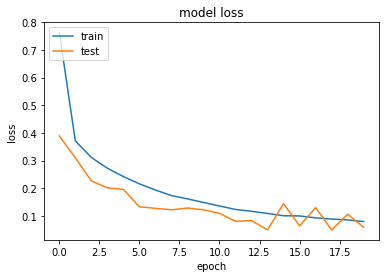

In [122]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Prediction of Classes

In [123]:
y_t = cnn2.predict_classes(testx)

In [124]:
t1 = y_t==1
t2 = y_t==0
t3 = y_t==2
t4 = y_t==3
print(t1.sum())
print(t2.sum())
print(t3.sum())
print(t4.sum())

490
488
451
571


Label Converion

In [125]:
print(y_t[:10])

for i in range(y_t.shape[0]):
    if y_t[i]==1:
        y_t[i]=2
    elif y_t[i]==2:
        y_t[i]=3
    elif y_t[i]==3:
        y_t[i]=6
    else:
        y_t[i]=0


t1 = y_t==2
t2 = y_t==0
t3 = y_t==3
t4 = y_t==6
print(t1.sum())
print(t2.sum())
print(t3.sum())
print(t4.sum())



[0 3 0 0 0 0 0 0 0 0]
490
488
451
571


Create a DataFrame using Pandas and dump our output to it

In [126]:
import pandas as pd
lt = [x for x in range(y_t.shape[0])]
bt = []
for i in range(y_t.shape[0]):
    bt.append(y_t[i])

dt = {'image_index':lt,
        'class':bt}
df = pd.DataFrame(dt)
df.to_csv('subodh_kumar_rai4.csv',index=False)
